1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

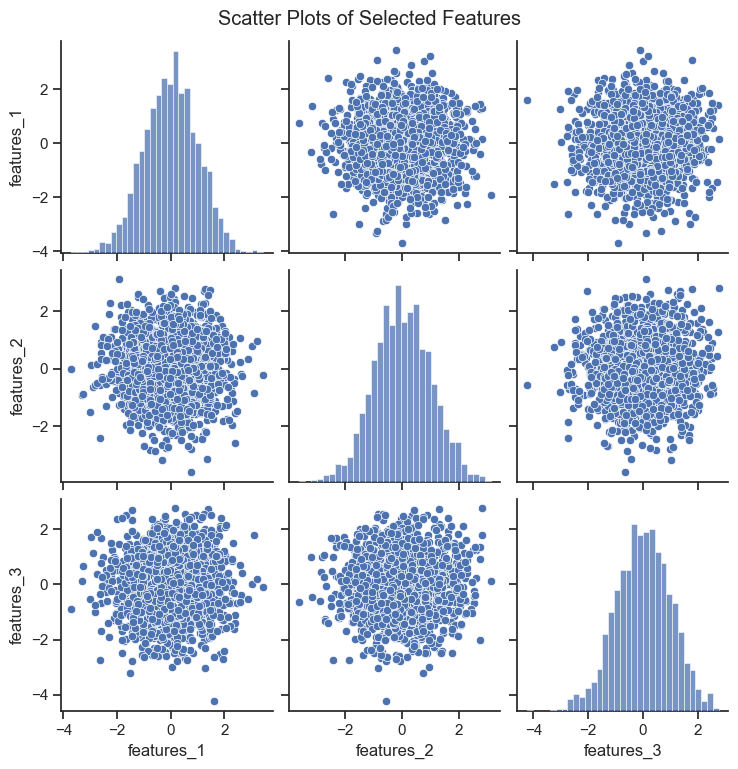

            features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000


'From the correlation matrix, it is clear that there is no strong linear correlation between any pair of the features.\n   The correlations are very small, which means that the features are not strongly related.'

In [1]:
import numpy as np
import pickle
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm
from scipy.integrate import trapz

df = pd.read_csv('./regression_generated.csv')
df.head()

# Selecting the specified features
selected_features = ['features_1', 'features_2', 'features_3']

# Creating scatter plots for all possible combinations
sns.set(style="ticks")
sns.pairplot(df[selected_features])
plt.suptitle('Scatter Plots of Selected Features', y=1.02)
plt.show()

# creating a correlation matrix
correlation_matrix = df[selected_features].corr()
print(correlation_matrix)

"""From the correlation matrix, it is clear that there is no strong linear correlation between any pair of the features.
   The correlations are very small, which means that the features are not strongly related."""

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

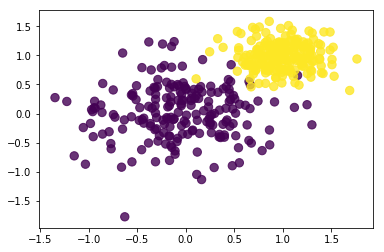

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

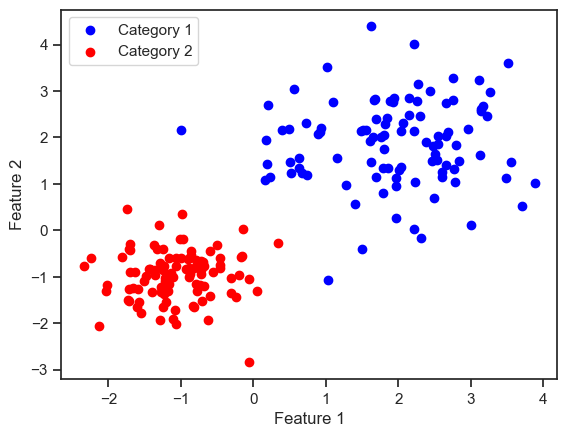

In [3]:
def generate_2d_dataset(num_samples, mean1, std1, mean2, std2):
    std1 = np.array(std1)
    std2 = np.array(std2)

    category1_samples = np.random.multivariate_normal(mean1, np.diag(std1**2), num_samples)

    category2_samples = np.random.multivariate_normal(mean2, np.diag(std2**2), num_samples)
    
    labels = np.concatenate([np.zeros(num_samples), np.ones(num_samples)])
    dataset = np.concatenate([category1_samples, category2_samples])
    
    return dataset, labels

def plot_color_coded_scatter(dataset, labels):
    category1_samples = dataset[labels == 0]
    category2_samples = dataset[labels == 1]
    
    plt.scatter(category1_samples[:, 0], category1_samples[:, 1], c='blue', label='Category 1')
    plt.scatter(category2_samples[:, 0], category2_samples[:, 1], c='red', label='Category 2')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    
    plt.show()

num_samples_per_category = 100
mean_category1 = [2, 2]
std_category1 = [1, 1]

mean_category2 = [-1, -1]
std_category2 = [0.5, 0.5]

dataset, labels = generate_2d_dataset(num_samples_per_category, mean_category1, std_category1, mean_category2, std_category2)

plot_color_coded_scatter(dataset, labels)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

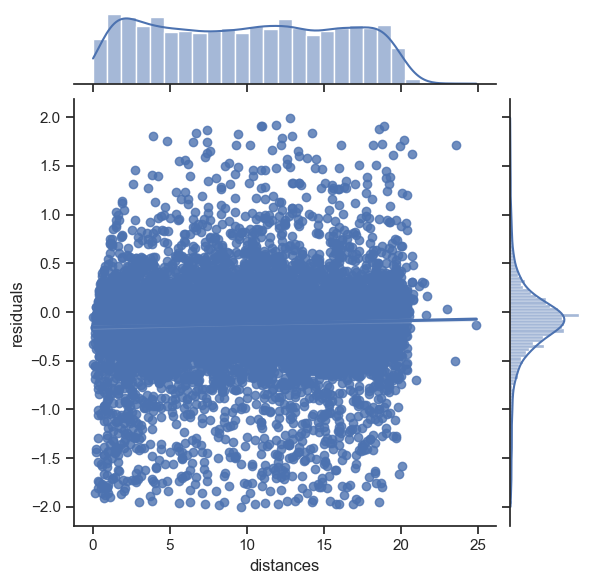

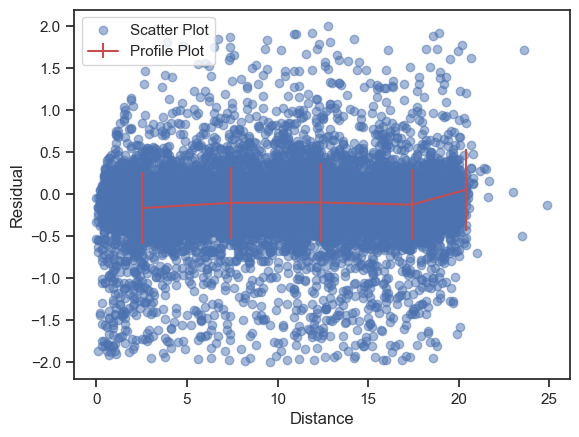

In [4]:
url = "https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl?dl=1"
response = requests.get(url)
with open("residuals_261.pkl", "wb") as f:
    f.write(response.content)

with open("residuals_261.pkl", "rb") as f:
    data = pickle.load(f)

df = pd.DataFrame(data.tolist())

cleaned_data = df[abs(df['residuals']) < 2]

#Seaborn jointplot
sns.jointplot(x='distances', y='residuals', data=cleaned_data, kind='reg')
plt.show()

bin_width = 5 
bins = np.arange(0, cleaned_data['distances'].max() + bin_width, bin_width)
indices = np.digitize(cleaned_data['distances'], bins)
groups = cleaned_data.groupby(indices)

x = [group['distances'].mean() for _, group in groups]
y = [group['residuals'].mean() for _, group in groups]
err_y = [group['residuals'].std() for _, group in groups]

# Creating a profile
bin_width = 5
bins = np.arange(0, cleaned_data['distances'].max() + bin_width, bin_width)
indices = np.digitize(cleaned_data['distances'], bins)
groups = cleaned_data.groupby(indices)

x = [group['distances'].mean() for _, group in groups]
y = [group['residuals'].mean() for _, group in groups]
err_y = [group['residuals'].std() for _, group in groups]

#scatter plot
plt.scatter(cleaned_data['distances'], cleaned_data['residuals'], alpha=0.5, label='Scatter Plot')

#profile plot
plt.errorbar(x, y, yerr=err_y, fmt='r-', label='Profile Plot')

plt.xlabel('Distance')
plt.ylabel('Residual')
plt.legend()
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


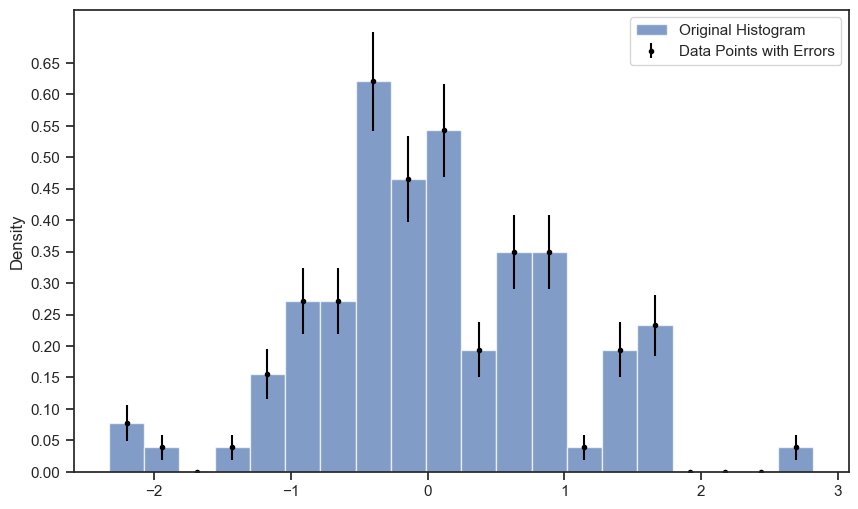

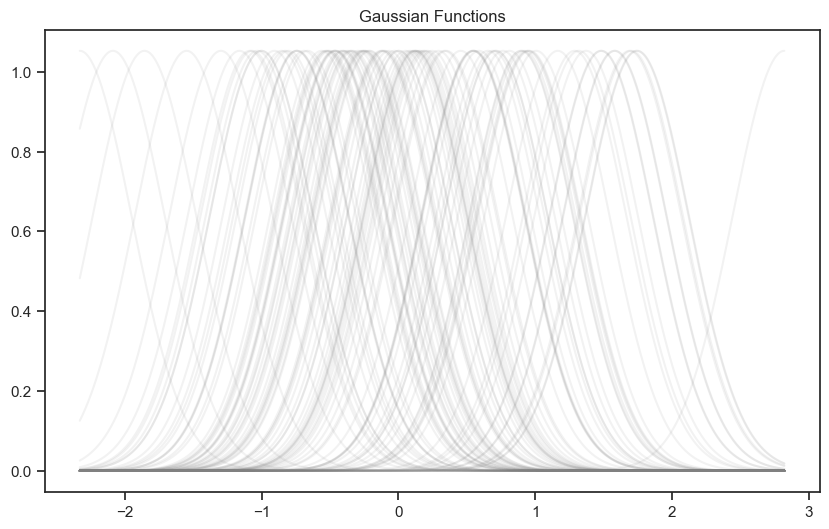

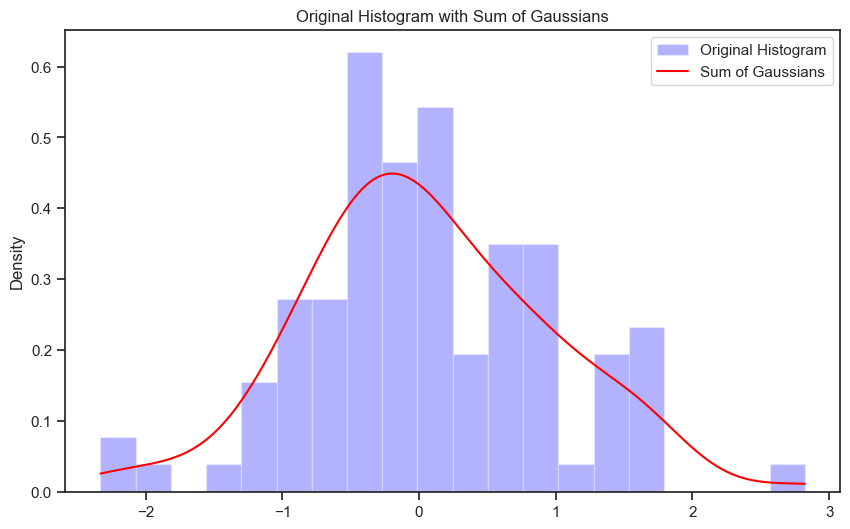

In [7]:
mean = 0
std_dev = 1
N = 100

x = np.random.normal(mean, std_dev, N)
plt.figure(figsize=(10, 6))

hist, edges, _ = plt.hist(x, bins=20, alpha=0.7, label='Original Histogram', density=True)
plt.ylabel('Density')
plt.yticks(np.arange(0, max(hist) + 0.05, step=0.05))

bin_centers = 0.5 * (edges[:-1] + edges[1:])
errors = np.sqrt(hist * N) / N 
plt.errorbar(bin_centers, hist, yerr=errors, fmt='.', color='black', label='Data Points with Errors')
plt.legend()
plt.show()

x_values = np.linspace(min(x), max(x), 1000)
# Standard deviation parameter for Gaussian functions
gaussian_std_dev = 1.06 * x.std() * x.size ** (-1 / 5)
gaussians = [norm.pdf(x_values, loc=xi, scale=gaussian_std_dev) for xi in x]

# plot for gaussian functions
plt.figure(figsize=(10, 6))
plt.title('Gaussian Functions')

for gaussian in gaussians:
    plt.plot(x_values, gaussian, color='gray', alpha=0.1)
plt.show()

# Suming and normalizing
sum_gaussians = np.sum(gaussians, axis=0)
integral_original = trapz(hist, bin_centers)
integral_sum_gaussians = trapz(sum_gaussians, x_values)
normalized_sum_gaussians = sum_gaussians * (integral_original / integral_sum_gaussians)

plt.figure(figsize=(10, 6))
plt.title('Original Histogram with Sum of Gaussians')
plt.hist(x, bins=20, alpha=0.3, density=True, color='blue', label='Original Histogram')
plt.plot(x_values, normalized_sum_gaussians, color='red', label='Sum of Gaussians')

plt.ylabel('Density')
plt.legend()
plt.show()